In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.18.0


In [13]:
observations = 10000
xs = np.random.uniform(low=-10,high=10, size = (observations, 1))
zs = np.random.uniform(low=-10,high=10, size = (observations, 1))
inputs = np.column_stack((xs,zs))
print(inputs.shape)

(10000, 2)


In [14]:
noise = np.random.uniform(low=-1, high=1, size=(observations,1))
targets = 10*xs + 12*zs - 3 + noise
np.savez('TF_dataset', inputs=inputs, targets=targets)

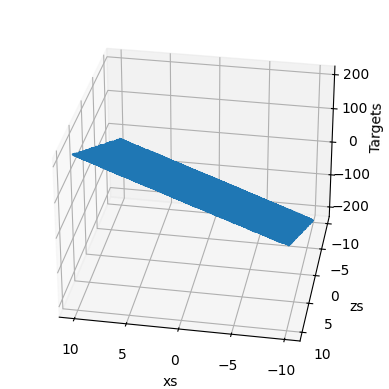

In [15]:
targets=targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

In [16]:
init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print(weights, biases)

[[-0.04540006]
 [-0.09702102]] [0.04980125]


In [17]:
targets = targets.reshape(observations, 1)
eta = 0.01
for i in range(100):
  outputs = np.dot(inputs, weights) + biases
  deltas = outputs - targets

  loss = np.sum(deltas**2)/2/observations
  print(loss)
  deltas_scaled = deltas/observations
  weights = weights - eta * np.dot(inputs.T, deltas_scaled)
  biases = biases - eta * sum(deltas_scaled)


4068.2837571514033
1836.5183544182103
830.3912888945151
376.7804403025274
172.24470582920094
79.99332963530506
38.361008081410404
19.54889198941645
11.025145135125907
7.140334050417869
5.347639128473913
4.498916344738192
4.076554790061575
3.847193607305169
3.7056150387261892
3.604370022020271
3.5220526749909884
3.4489980534059375
3.3808345057857805
3.3155769753579714
3.2523166087426807
3.1906300034571977
3.1303128803079625
3.07126001227323
3.0134110886439363
2.95672630419181
2.9011753491076875
2.846732440404955
2.7933740770553244
2.741078023146816
2.6898228447607133
2.639587696573229
2.590352221131669
2.5420964990173145
2.494801022037566
2.448446676886902
2.403014733611948
2.3584868363254596
2.314844995015437
2.27207157792773
2.2301493042851455
2.1890612372349145
2.1487907769741548
2.109321654028987
2.070637922675077
2.032723954492596
1.9955644320508945
1.9591443427196022
1.9234489726032011
1.8884639005963968
1.8541749925578632
1.8205683955999645
1.787630532492122
1.7553480961755166
1.

In [18]:
print(weights, biases)

[[10.00118207]
 [11.99973323]] [-1.8941937]


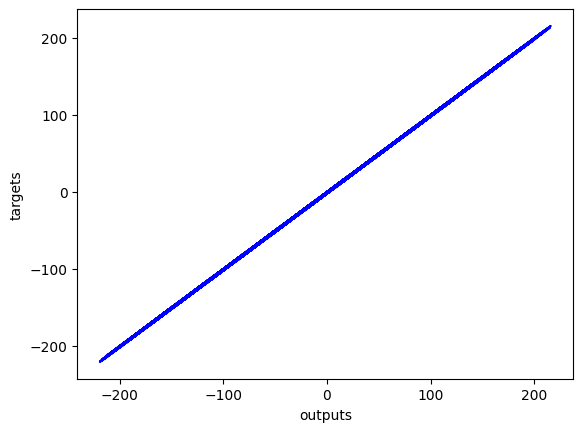

In [19]:
plt.plot(outputs, targets, color='blue')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()